# Photo Palette

## Creates a list of colors and their proportions from a picture

The initial idea for this is to use colors and their proportions for fashion.

A user will be able to take a photo, for example, a picture of their face, identify the proportions of colors (background, skin, hair, eyes, etc.) and use this info. when planning out the clothing colors they will use as primary, secondary, highlights, etc.

In [1]:
import numpy as np  # image file format will be arrays in numpy
import cv2 as cv  # images will be taken using OpenCV, specifically, opencv-python
import matplotlib.pyplot as plt  # shows images in the notebook and shows charts
from sklearn.cluster import KMeans
import pandas as pd

### Taking and accessing a photo

#### This next code block will open the computer's default camera and start showing images to the user as a video feed.

Current interactions are pressing "**s**" to snap a photo and "**q**" to quit.

Snapping a photo will cause it to be saved in the user's computer. Only one image is saved at a time, and it is accessible in **data/image-capture/**.

Based on sources [here](https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv#34588758) and [here](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python).

In [2]:
vid_feed = cv.VideoCapture(0) #  goes with the first camera it can find in this device

#  creates a new window titled by the input string
cv.namedWindow('test')
print('video feed launching')
while True:
    success_bool, frame = vid_feed.read()
    
    if (not success_bool):
        print('error reading video feed')
        break        
    
    #cropping frame
    frame = frame[150:420, 280:520] #  [ V , > ]
    
    cv.imshow('test', frame)
    # cv.waitKey(1) waits 1ms for a key press,
    # returning that pressed key as a string
    k = cv.waitKey(1) 

    # press 's' to save the image into the following directory with the following name
    if k == ord("s"):
        cv.imwrite('data/capturecopy3.png', frame) # note: if a folder does not already exist, it will miss
        print('image saved')
    elif k == ord("q"):
        print('quit')
        break
    else:
        pass

#closes all windows opened by cv
cv.destroyAllWindows()    
    

video feed launching
quit


#### Reading the image from its directory.

In [3]:


image = cv.imread('data/capturecopy2.png')


#### To make a window pop up with this image, open cv is used.

In [4]:

cv.imshow('Example - Show image in window',image)
 
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


For reading here in the notebook, I will use matplot lib. Note that open cv saves files in BGR format, while matplotlib's imshow() uses in RGB format. Examples [here](https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/).

In [ ]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,0])  # red

In [ ]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,1])  # green

In [ ]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,2])  # blue

In [ ]:
plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB))) 

### Finding the most common colors in this image.

At first, I had hoped for a simple histogram with different color names (red, orange, yellow, etc.).

From the perspective of RGB space, each pixel currently exists as an array of 3 color intensities: Red, Green, and Blue.
![Image of RGB](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/RGB_Cube_Show_lowgamma_cutout_b.png/320px-RGB_Cube_Show_lowgamma_cutout_b.png)
However, this data is not automatically grouped. In order to find tones, clustering analysis will be done in the RGB space, and colors will be shown based on the cluster's descriptive features, without names. Some methods of distance-determining and clustering can be explored until something that fits well is found.
This approach is shown [here](https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/).

Then, I learned that OpenCV can also convert images to HLS. From the perspective of HLS space, each pixel currently exists as an array of 3 attributes: Hue, Lightness, and Saturation.

![Image of HSL, a close cousin of HLS](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HSL_color_solid_cylinder_saturation_gray.png/320px-HSL_color_solid_cylinder_saturation_gray.png)


HLS space seems fairly accessible. My guess is that this space can be made into a 1-dimensional hue series by selecting the hue value for each pixel. With only 1 dimension, grouping may be easier.

In [ ]:
# Converting from BGR to HLS_FULL
# HLS_FULL has 360 integers in its Hue value
image_HLS = cv.cvtColor(image, cv.COLOR_BGR2HLS_FULL)

image_HLS[28, 29:35, :]

In [ ]:
image_HLS[28:34, 29, :]

These arrays appear to have the following structure:

\[ Horizontal coordinate, Vertical coordinate, \[Hue, Lightness, Saturation\] \] 

In [ ]:
# selecting all hues available
# max location values are [270, 240, :]

image_hue_np = image_HLS[:, :, 0]
image_hue_np = image_hue_np.flatten()
image_hue_list_unsorted = list(image_hue_np)
image_hue_np.sort()
image_hue_list = list(image_hue_np)


In [ ]:
image_hue_list

In [ ]:
# how many times does the hue 3 occur?
image_hue_list.count(3)

In [ ]:
# how many unique hues are there in this pic?
unique_hues = np.unique(np.array(image_hue_list))

In [ ]:
plt.title("Image's hues")
plt.hist(image_hue_list, bins = unique_hues)
plt.show()

The following 1D chart was made based on code [here](https://stackoverflow.com/questions/23546552/1d-plot-matplotlib)

In [ ]:
image.shape

In [ ]:
np.array(image_HLS).shape

In [ ]:
plt.figure()
a = image_hue_list
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = ['b']  # Requires RGB color format
plt.eventplot(a, orientation='horizontal', colors=point_colors, alpha = .03)
plt.axis('on')
plt.show()

Now, I will make the bars show the colors they represent. I'm hoping for an effect similar to a spectrum.

The pixel color data currently looks like the following, with each pixel getting an array of [R, G, B] values that describe its color.

In [ ]:
(cv.cvtColor(image, cv.COLOR_BGR2RGB))[0:2,0:3,:]

In [ ]:
(cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,:].shape

In [ ]:
pixel_colors_RGB =  (cv.cvtColor(image, cv.COLOR_BGR2RGB))[:,:,:]
RGB_colors = pixel_colors_RGB.reshape(64800, 3)
RGB_colors

Matplotlib accepts RGB values in a particular format only:
"RGB or RGBA (red, green, blue, alpha) tuple of float values in a closed interval [0, 1]."

This conversion can be done rather smoothly via list comprehensions.

In [ ]:
image_RGB_tuples = [tuple(x / 255) for x in RGB_colors]  # takes each list of RGB values, divides by 255
print('This list has a length of', len(image_RGB_tuples))
print('This list has the type', type(image_RGB_tuples))
image_RGB_tuples[0]

In [ ]:
print('This list has a length of', len(image_hue_list_unsorted))  # this must be the same length
print('This list has the type', type(image_hue_list_unsorted))
image_hue_list_unsorted[0]

In [ ]:
plt.figure()
hues = [image_hue_list_unsorted]
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = [image_RGB_tuples]  # Requires RGB color format
plt.eventplot(hues, orientation='horizontal', colors = point_colors, alpha = 1)
plt.axis('on')
plt.xlabel('Hues')
plt.show()

# note: hues and point_colors need to be a list contained within another list
# learned through guess & check.

Due to this showing rings of blue and orange/brown, I suspect something went wrong. Perhaps the **RGB_colors** varible was scrambled when it was reshaped from **pixel_colors_rgb**?

Instead, let's try taking going from this hue list to RGB.

In [ ]:

image_rgb_tuples = [ [x, 100, 100] for x in image_hue_list_unsorted ] # HSV features filler S and V
# cv.cvtColor(, cv.COLOR_HSV2RGB )
image_rgb_tuples

Trying again.

In [ ]:
plt.figure()
hues = [image_hue_list_unsorted]
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = [image_RGB_tuples]  # Requires RGB color format
plt.eventplot(hues, orientation='horizontal', colors = point_colors, alpha = 1)
plt.axis('on')
plt.xlabel('Hues')
plt.show()

# note: hues and point_colors need to be a list contained within another list
# learned through guess & check.

Trying with **image_hue_list**.

In [ ]:
image_hue_tuple_recreation = [ tuple([x, 100, 100]) for x in image_hue_list ] # HSV features filler S and V
image_rgb_tuples

In [ ]:
plt.figure()
hues = [image_hue_list]
plt.hlines(1,1,256)  # Draw a horizontal line
point_colors = [image_RGB_tuples]  # Requires RGB color format
plt.eventplot(hues, orientation='horizontal', colors = point_colors, alpha = 1)
plt.axis('on')
plt.xlabel('Hues')
plt.show()

# note: hues and point_colors need to be a list contained within another list
# learned through guess & check.

Exploring image display.

In [ ]:
plt.imshow(cv.cvtColor(image_HLS, cv.COLOR_HLS2RGB))

There appears to be some information loss.





**Clustering in BGR and converting to RGB** will involve less conversion, so should retain more information quality.

Three phases are planned as follows:

1. Format the image data to be readable by sklearn. Visual location of pixels does not matter, only RGB coordinates need to be retained.

2. Make a working model and show its groups.

3. Output color swatches in rectangles or circles, ideally of varying sizes based on the number of points in each group.

4. Make these code blocks into functions.

5. Create a prototype user interface with simple options such as file input and groupings (to start off the demo notebook).

**1**

Image can be loaded here.

In [ ]:
image = cv.imread('data/capturecopy2.png')

Converting image to RGB color space.

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [ ]:
print(image.shape)
imshape_0 = image.shape[0]
imshape_1 = image.shape[1]
image

Reshaping image to remove the pixel's coordinates within the image. This should leave RGB distances as the only kind of distances considered.

In [ ]:
image = image.reshape(270*240, 3)
image.shape

In [ ]:
image[0, :]

**2**

Fitting a KMeans model to produce unsupervised clusters. I assume this will always need to be unsupervised learning, but the model and hyperparameters used later will be down to personal preference.

In [ ]:
groups = 6
kmeans_model = KMeans(n_clusters = groups, random_state = 0)
kmeans_model.fit(X = image)
predicted_groups = kmeans_model.predict(image)

**3**

Plotting a [3D representation](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) of the RGB values in this image's pixels.

In [ ]:
# scaling for matplotlib format requirements
image_RGB_scaled = image / 255
image_RGB_scaled

In [ ]:
fig = plt.figure(figsize = [16,10])
ax = plt.axes(projection = '3d')

ax.scatter3D(xs = image[:, 0], ys = image[:, 1], zs = image[:, 2], c = image_RGB_scaled)
plt.show()

Applying the model's group estimations.

In [ ]:
fig = plt.figure(figsize = [16,10])
ax = plt.axes(projection = '3d')

ax.scatter3D(xs = image[:, 0], ys = image[:, 1], zs = image[:, 2], c = [predicted_groups])
plt.show()

In [ ]:
# to make the above more descriptive, let's use the mean RGB colors for each group
# assuming RGB format for indices

group_colors = []
for group in range(groups):
    in_group = (predicted_groups == group)
    
    group_size = image[in_group].shape[0]
    print(f'Group {group}: {group_size} elements.')
    
    # finding mean RGB values for the pixels in each group
    pixels_in_group = image[in_group]
    
    R = pixels_in_group[:,0]
    mean_R = np.mean(R)
    print(f'The mean red value for group {group} is {mean_R}.')
    
    G = pixels_in_group[:,1]
    mean_G = np.mean(G)
    print(f'The mean green value for group {group} is {mean_G}.')
    
    B = pixels_in_group[:,2]
    mean_B = np.mean(B)
    print(f'The mean blue value for group {group} is {mean_B}.')
    
    # creating an array of point colors for matplotlib
    # scaled to 0-1 in order to work correctly
    for count in range(group_size):
        group_colors.append([mean_R / 255, mean_G / 255, mean_B / 255])
        
group_colors

In [ ]:
fig = plt.figure(figsize = [16,10])
ax = plt.axes(projection = '3d')

ax.scatter3D(xs = image[:, 0], ys = image[:, 1], zs = image[:, 2], c = group_colors)
plt.show()

For future results, it may be helpful to find a handful of the largest groups. It may also be useful to include 3D image rotation.

In [ ]:
group_sizes = []
for group in range(groups):
    in_group = (predicted_groups == group)
    group_size = image[in_group].shape[0]
    group_sizes.append(group_size)
    
# this can be easily done with pandas
group_sizes_df = pd.DataFrame(data = group_sizes, columns = ['num_elements'])
group_sizes_df.sort_values(by = 'num_elements', ascending = False, inplace = True)
group_sizes_df

In [ ]:
print('The 3 largest groups:')
group_sizes_df.iloc[0:3,:]

Finally, it may be helpful and more readable to map these grouped colors back onto the original image.

In [ ]:
returned_image = np.array(group_colors).reshape(imshape_0, imshape_1, 3)

In [ ]:
# showing the image with only the mean group colors included
plt.imshow(returned_image)

Well, that was informative. First off, this is a near-perfect return for the user, alongside the mapped image for context. Secondly, this may explain why the color graph did not align with the grouping graph above.

The process above ordered all elements by group number, and a slightly different process will be needed to be used if the image locations of each element are to be maintained.

It may also be helpful to generalize these into functions.

First, redoing pixel colorings while preserving their visual order:

In [ ]:
# to make the above more descriptive, let's use the mean RGB colors for each group
# assuming RGB format for indices

pixel_colors = [None]*len(predicted_groups)

for group in range(groups):
    
    in_group = (predicted_groups == group)
    
    group_size = image[in_group].shape[0]
    print(f'Group {group}: {group_size} elements.')
    
    # finding mean RGB values for the pixels in each group
    pixels_in_group = image[in_group]
    
    R = pixels_in_group[:,0]
    mean_R = np.mean(R)
    print(f'The mean red value for group {group} is {mean_R}.')
    
    G = pixels_in_group[:,1]
    mean_G = np.mean(G)
    print(f'The mean green value for group {group} is {mean_G}.')
    
    B = pixels_in_group[:,2]
    mean_B = np.mean(B)
    print(f'The mean blue value for group {group} is {mean_B}.')
    
    # creating an array of point colors for matplotlib
    # scaled to 0-1 in order to work correctly
    for pixel_index in range(len(pixel_colors)):
        if in_group[pixel_index]:
            pixel_colors[pixel_index] =[mean_R / 255, mean_G / 255, mean_B / 255]
        else:
            pass
        
pixel_colors

In [ ]:
fig = plt.figure(figsize = [16,10])
ax = plt.axes(projection = '3d')

ax.scatter3D(xs = image[:, 0], ys = image[:, 1], zs = image[:, 2], c = pixel_colors)
plt.show()

In [ ]:
returned_image = np.array(pixel_colors).reshape(imshape_0, imshape_1, 3)

In [ ]:
# showing the image with only the mean group colors included
plt.imshow(returned_image)

After some fuss, here we have (a rough draft of) a color-summary mask painted over the original image.

**4**

Functions:

image_in : Take in an image and preprocess it.

make_3d_scatterplot : Show a 3D scatterplot of its colors.

produce_color_clusters : Cluster per preference.

painted_image_summary : Show the image with color summaries based on these clusters.

show_photo_palette : Show the color palette with each group's color summary and size relative to all of the image's pixels.

In [6]:
def image_in(file_location):
    '''
    Reads an image from a local file location. 
    Shows the image to the user, converts the image to an RGB numpy array, cuts out coordinate data, and returns it.
    
    file_location is a string.
    
    All formats readable by opencv should be accepted. Larger images may cause processing trouble.
    
    ex:
    
    imported_image, shape_0, shape_1 = image_in('data/capturecopy2.png')'''
    try:
        image = cv.imread(file_location)  # input the image
        plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB)))  # display the image (optional)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert the image from BGR to RGB color space
        imshape_0 = image.shape[0]  # height in pixels
        imshape_1 = image.shape[1]  # width in pixels
        image = image.reshape(imshape_0 * imshape_1, 3)  # removes pixel coordinate data from image
        return image, imshape_0,imshape_1
        
    except Exception:
        print('Error: image input failed.')
    

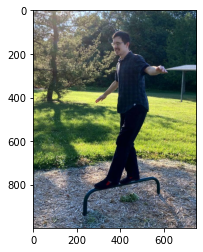

In [16]:
imported_image, shape_0, shape_1 = image_in('data/1.jpg')

In [17]:
def make_3d_scatterplot(image_colors):
    '''
    Show a 3D scatterplot of an image's colors.
    
    ex:
    
    make_3d_scatterplot(imported_image)
    '''
    try:
        image_RGB_scaled = image_colors / 255  # making matplotlib compatible RGB values
        fig = plt.figure(figsize = [16,10])
        ax = plt.axes(projection = '3d')

        ax.scatter3D(xs = image_colors[:, 0], ys = image_colors[:, 1], zs = image_colors[:, 2], c = image_RGB_scaled)
        plt.show()
        return None
    
    except Exception:
        print('Error: scatterplot unsuccessful.')

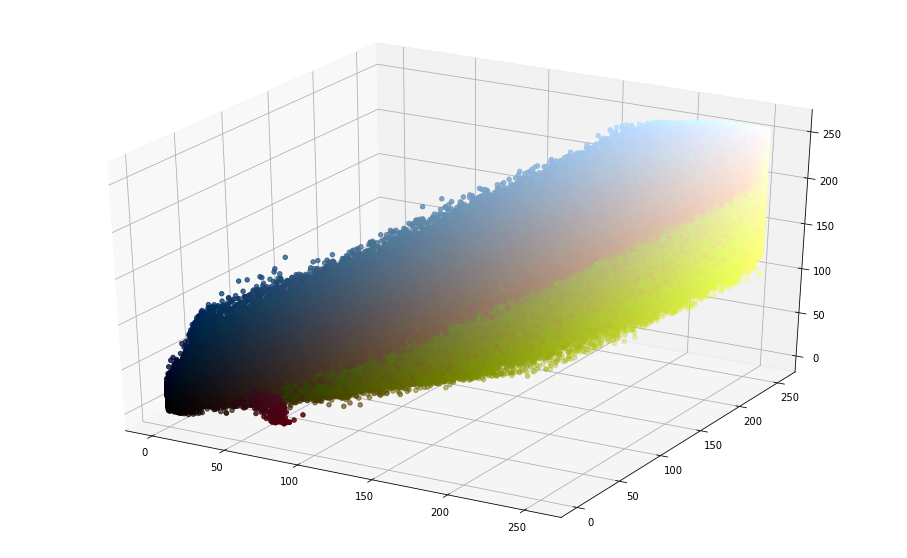

In [18]:
make_3d_scatterplot(imported_image)

In [19]:
def produce_color_clusters(image, groups = 6, model = 'kmeans', random_seed = 0):
    '''Produces clusters in RGB color space.
    
    Returns group predictions for each pixel in the image.
    
    Currently only produces kmeans clusters.
    
    ex:
    color_clusters = produce_color_clusters(imported_image)
    
    '''
    try:
        if model == 'kmeans':
            kmeans_model = KMeans(n_clusters = groups, random_state = random_seed)
            kmeans_model.fit(X = image)
            predicted_groups = kmeans_model.predict(image)
            return predicted_groups, groups
        
    except Exception:
        print('Error: clustering was unsuccessful.')

In [20]:
color_clusters, groups = produce_color_clusters(imported_image)

In [41]:
def painted_image_summary(image, predicted_groups):
    '''
    Uses an imported image and its color cluster predictions to paint over the image,
    using in the mean colors of each cluster.
    
    ex:
    painted_image_summary(imported_image, color_clusters)
    '''
    try:
        pixel_colors = [None]*len(predicted_groups)

        for group in range(groups):
    
            in_group = (predicted_groups == group)

            group_size = image[in_group].shape[0]

            # finding mean RGB values for the pixels in each group
            pixels_in_group = image[in_group]

            R = pixels_in_group[:,0]
            mean_R = np.mean(R)

            G = pixels_in_group[:,1]
            mean_G = np.mean(G)

            B = pixels_in_group[:,2]
            mean_B = np.mean(B)

            # creating an array of point colors for matplotlib
            # scaled to 0-1 in order to work correctly
            for pixel_index in range(len(pixel_colors)):
                if in_group[pixel_index]:
                    pixel_colors[pixel_index] =[mean_R / 255, mean_G / 255, mean_B / 255]
                else:
                    pass
        
        painted_image = np.array(pixel_colors).reshape(shape_0, shape_1, 3)
        plt.imshow(painted_image)
        plt.show()
        return None
    
    except Exception:
        print('Error: Painted image summary unsuccessful.')
    

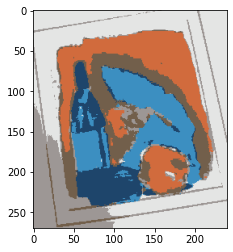

In [42]:
painted_image_summary(imported_image, color_clusters)

In [43]:
def show_photo_palette(predicted_groups, num_groups = 6, top_n = 3):
    '''
    Produces a rectangle that shows each of the grouped colors and its size relative to the total image.
    
    ex:
    
    show_photo_palette(color_clusters)
    '''
    # finding the size of each group
    group_sizes = []
    for group_no in range(num_groups):
        in_group = (predicted_groups == group_no)
        group_size = imported_image[in_group].shape[0]
        group_sizes.append(group_size)
    
    # sorting groups by group size
    group_sizes_df = pd.DataFrame(data = group_sizes, columns = ['num_elements'])
    group_sizes_df.sort_values(by = 'num_elements', ascending = False, inplace = True)
    size_order = group_sizes_df.index
    
    # creating an array of group colors in size order
    group_colors = []
    for group in size_order:
        in_group = (predicted_groups == group)

        group_size = imported_image[in_group].shape[0]
        
        # finding mean RGB values for the pixels in each group
        pixels_in_group = imported_image[in_group]

        R = pixels_in_group[:,0]
        mean_R = np.mean(R)

        G = pixels_in_group[:,1]
        mean_G = np.mean(G)

        B = pixels_in_group[:,2]
        mean_B = np.mean(B)

        # creating an array of point colors for matplotlib
        # scaled to 0-1 in order to work correctly
        for count in range(group_size):
            group_colors.append([mean_R / 255, mean_G / 255, mean_B / 255])

    

    returned_image = np.array(group_colors).reshape(shape_0, shape_1, 3)
    # showing the image with only the mean group colors included
    plt.imshow(returned_image)
    plt.plot()

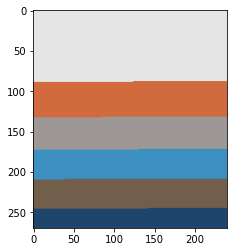

In [44]:
show_photo_palette(color_clusters)

**5**

A little summary UI.

In [45]:
import numpy as np  # image file format will be arrays in numpy
import cv2 as cv  # images will be taken using OpenCV, specifically, opencv-python
import matplotlib.pyplot as plt  # shows images in the notebook and shows charts
from sklearn.cluster import KMeans
import pandas as pd
import glob

glob use from [here](https://stackoverflow.com/questions/40452536/open-file-only-using-its-extension-python)

1, 2, or 3?
3
data\3.jpg
showing image
making scatterplot


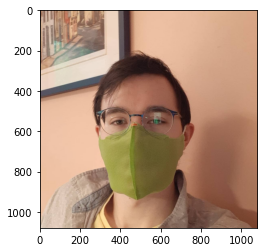

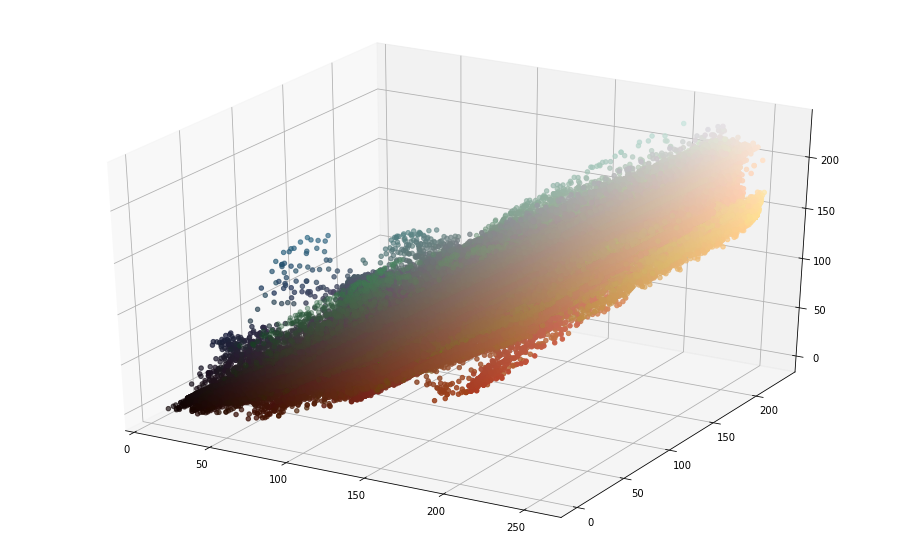

clustering (no output)
painting


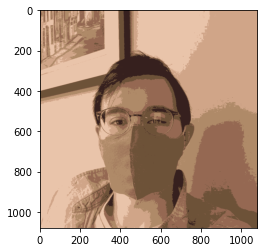

making palette


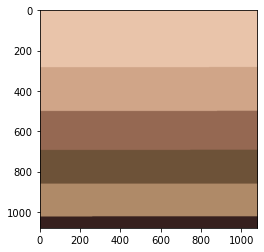

In [47]:
file_name = str(input('1, 2, or 3?\n'))
full_file_name = glob.glob(f'data/{file_name}.*')
print(full_file_name[0])

print('showing image')
imported_image, shape_0, shape_1 = image_in(full_file_name[0])
print('making scatterplot')
make_3d_scatterplot(imported_image)
print('clustering (no output)')
color_clusters, groups = produce_color_clusters(imported_image)
print('painting')
painted_image_summary(imported_image, color_clusters)
print('making palette')
show_photo_palette(color_clusters)